In [94]:
import glob
import cv2
import numpy as np
from PIL import Image
from imgaug import augmenters as iaa
from skimage.measure import compare_ssim as ssim

In [81]:
def augment_test_image(frame_paths, n, method):
    img = Image.open(frame_paths[n])
    img = np.asarray(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    im = np.expand_dims(img, axis=3)
    im = np.expand_dims(im, axis=0)
    aug_im = method.augment_images(im)
    
    aug_im = np.squeeze(aug_im, axis=3)
    aug_img = np.squeeze(aug_im, axis=0)
    return img, aug_img

In [80]:
sample_folder = '/home/emsala/Documenten/Studie/These/phashing/program/create_dataset/augmentation/sample_frames/sampled_frames/'
sample_paths = sorted(glob.glob(sample_folder + '*'))

In [122]:
N = range(0, len(sample_paths))
n = N[9]

In [117]:
all_parameters = range(-150, 150, 5)
selected_parameters = {}
ssim_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for parameter in all_parameters:
    add = iaa.Sequential([iaa.Add(parameter, False)])
    img, aug_img = augment_test_image(sample_paths, n, add)
    
    ssim_const = round(ssim(img, aug_img),1)
    for i in ssim_values:
        if ssim_const == i:
            selected_parameters[i] = parameter
            ssim_values.pop(ssim_values.index(i))
            print(selected_parameters)
            
    if len(ssim_values) < 1:
        break
    
    
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  
/usr/lib/python3/dist-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


{0.1: -150}
{0.1: -150, 0.2: -115}
{0.1: -150, 0.2: -115, 0.3: -90}
{0.1: -150, 0.2: -115, 0.3: -90, 0.4: -75}
{0.1: -150, 0.2: -115, 0.3: -90, 0.4: -75, 0.5: -65}
{0.1: -150, 0.2: -115, 0.3: -90, 0.4: -75, 0.5: -65, 0.6: -55}
{0.1: -150, 0.2: -115, 0.3: -90, 0.4: -75, 0.5: -65, 0.6: -55, 0.7: -45}
{0.1: -150, 0.2: -115, 0.3: -90, 0.4: -75, 0.5: -65, 0.6: -55, 0.7: -45, 0.8: -35}
{0.1: -150, 0.2: -115, 0.3: -90, 0.4: -75, 0.5: -65, 0.6: -55, 0.7: -45, 0.8: -35, 0.9: -30}


In [130]:
for parameter in selected_parameters.values():
    add = iaa.Sequential([iaa.Add(parameter, False)])
    img, aug_img = augment_test_image(sample_paths, n, add)
    h = np.hstack((img, aug_img))
    cv2.imshow('{}'.format(parameter), h)
    cv2.waitKey()
#     f = plt.figure()
#     f.add_subplot(1,2, 1)
#     plt.imshow(np.rot90(image,2))
#     f.add_subplot(1,2, 2)
#     plt.imshow(np.rot90(aug_image,2))
#     plt.show(block=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


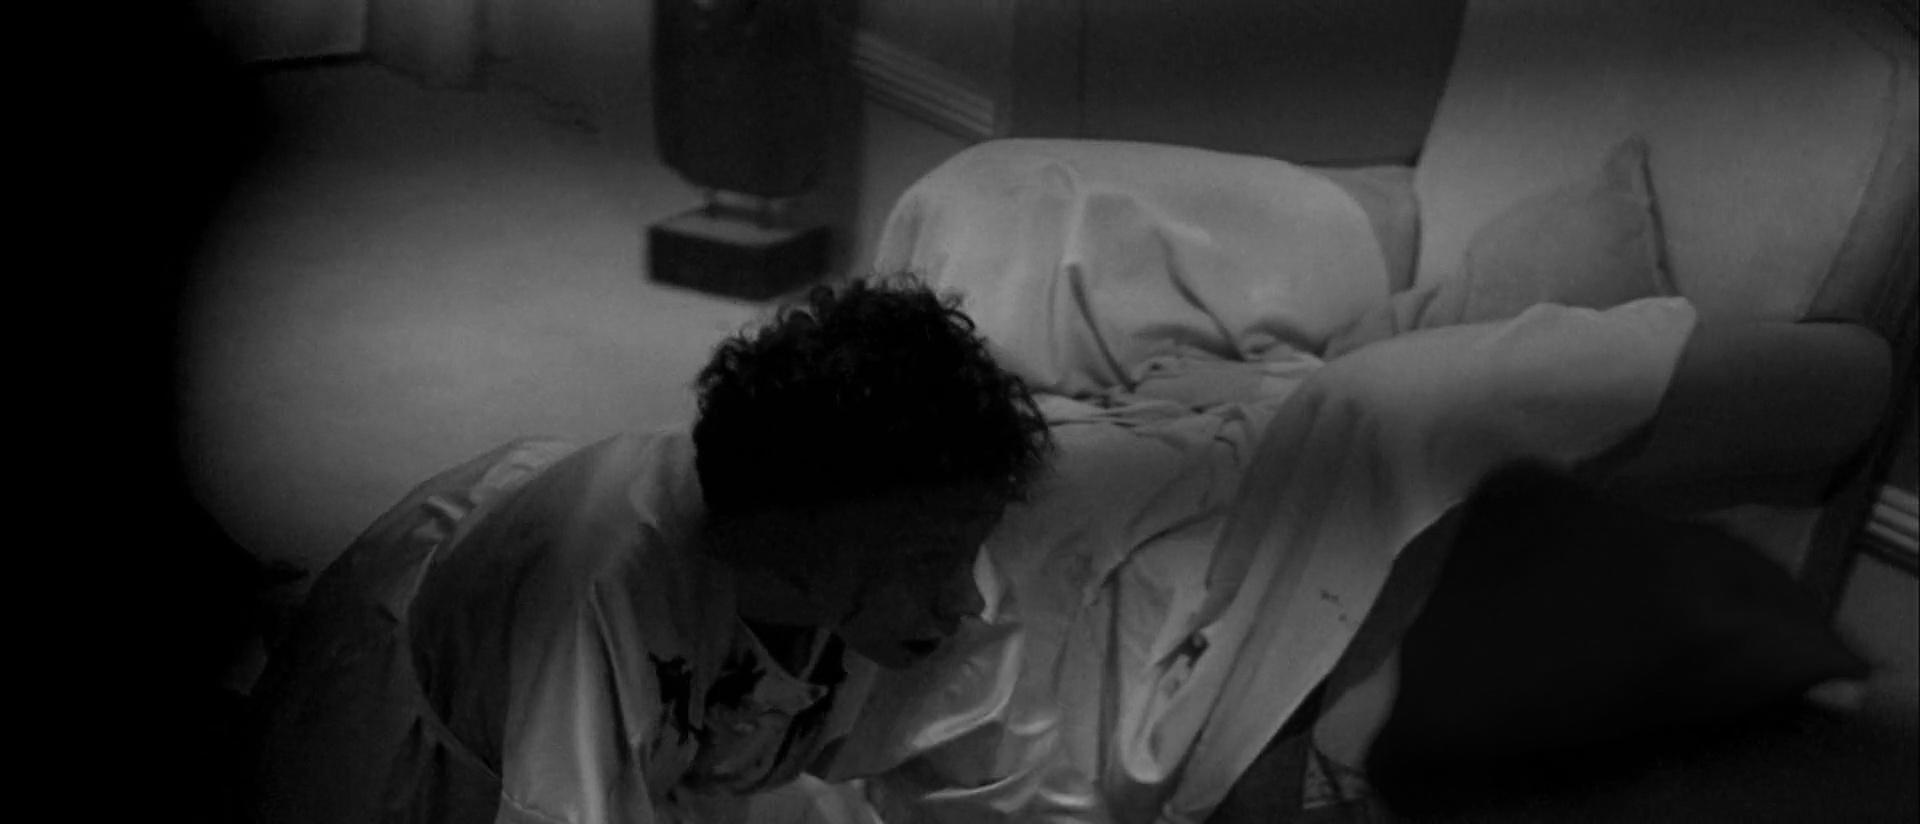

In [127]:
image

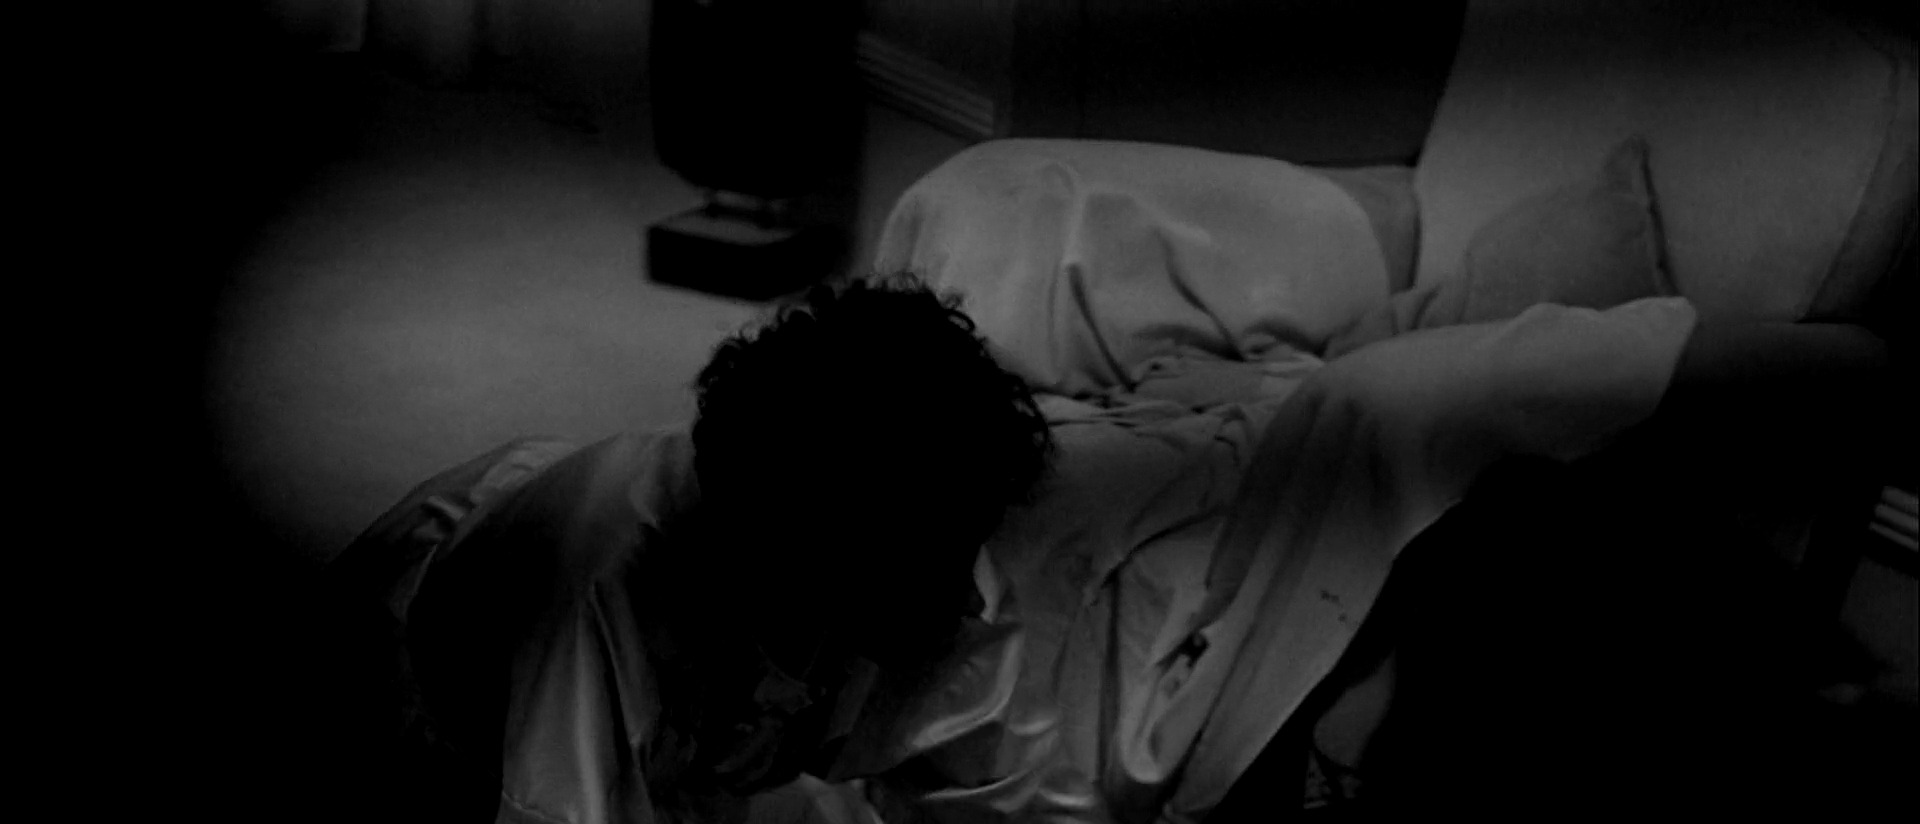

In [126]:
aug_image

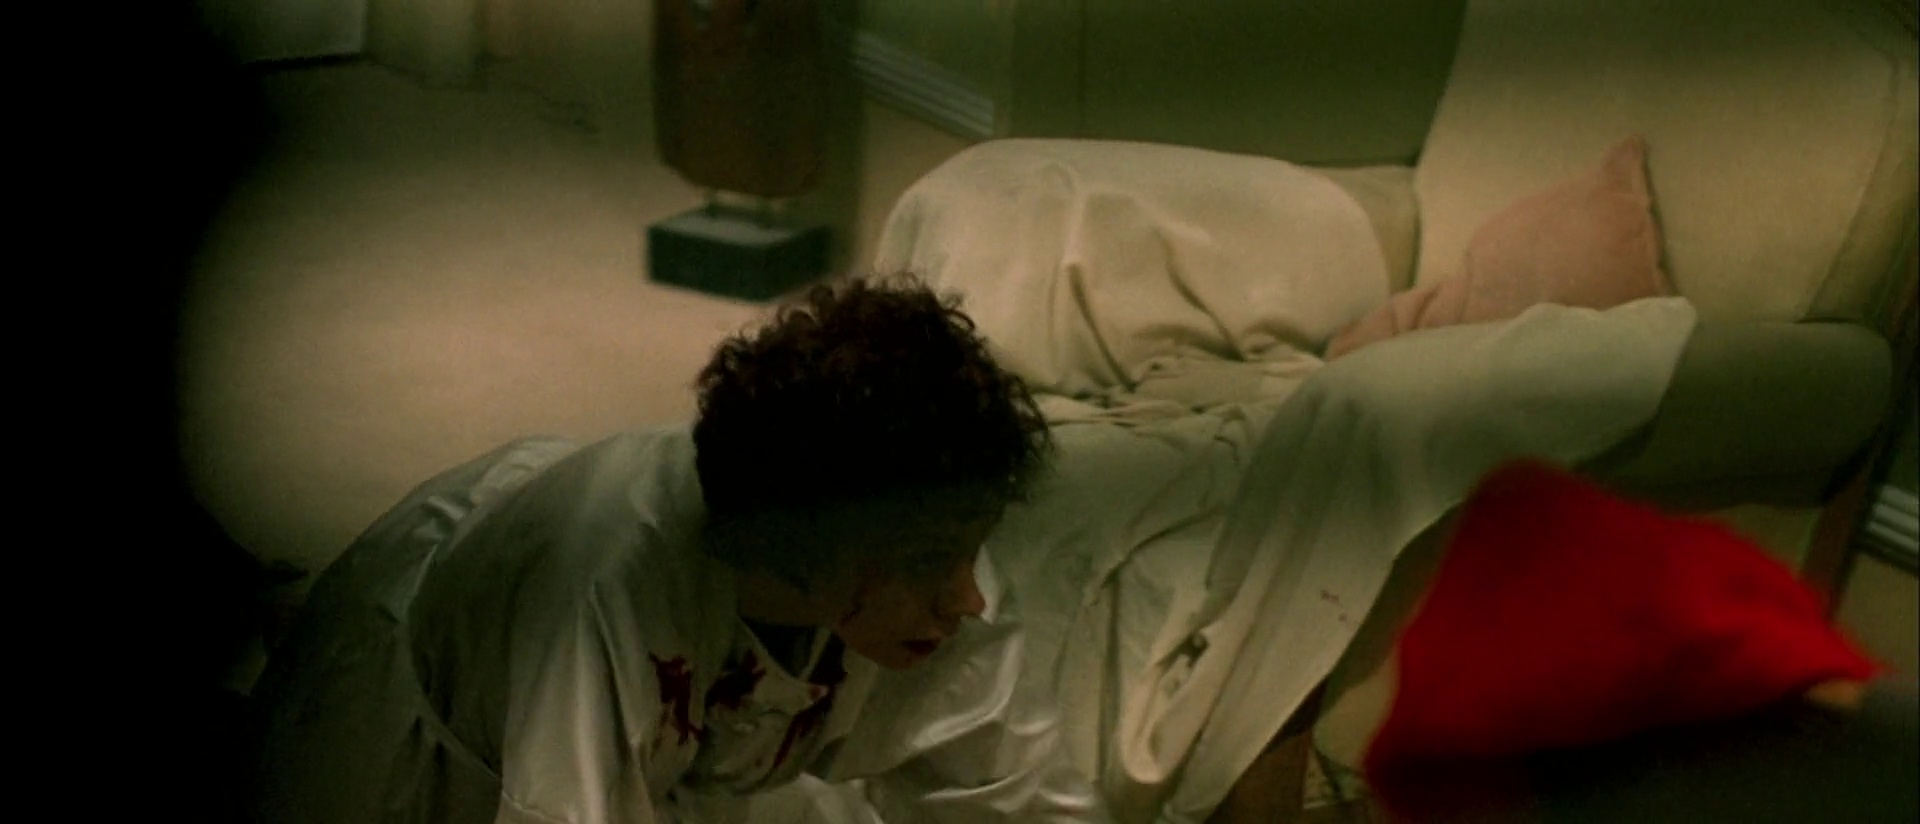

In [124]:
img = Image.open(sample_paths[n])
img

In [ ]:

img, aug_img = augment_test_image(frame_paths, n, method)




In [35]:
def remove_rgb_dimensions(img):
    img = img_as_float(np.asarray(image))
    h, w, d = img.shape
    img = img.flatten()
    img = img.reshape(h, w*d)
    return img

/usr/lib/python3/dist-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


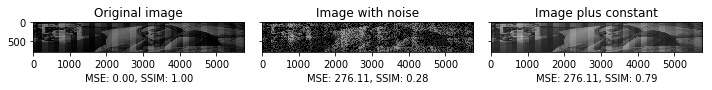

In [36]:



img = remove_rgb_dimensions(img)
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

def mse(x, y):
    return np.linalg.norm(x - y)

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mse(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mse(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mse(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise))
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const, ssim_const))
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()